# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [53]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [54]:
# a) Obtendo a média e a diferença através de uma multiplicação matricial

# Visualizando dados de manira simplificada
df['média'] = df.mean(axis=1)
df['diferença/evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')
df.head()

,p1,p2,média,diferença/evolução
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


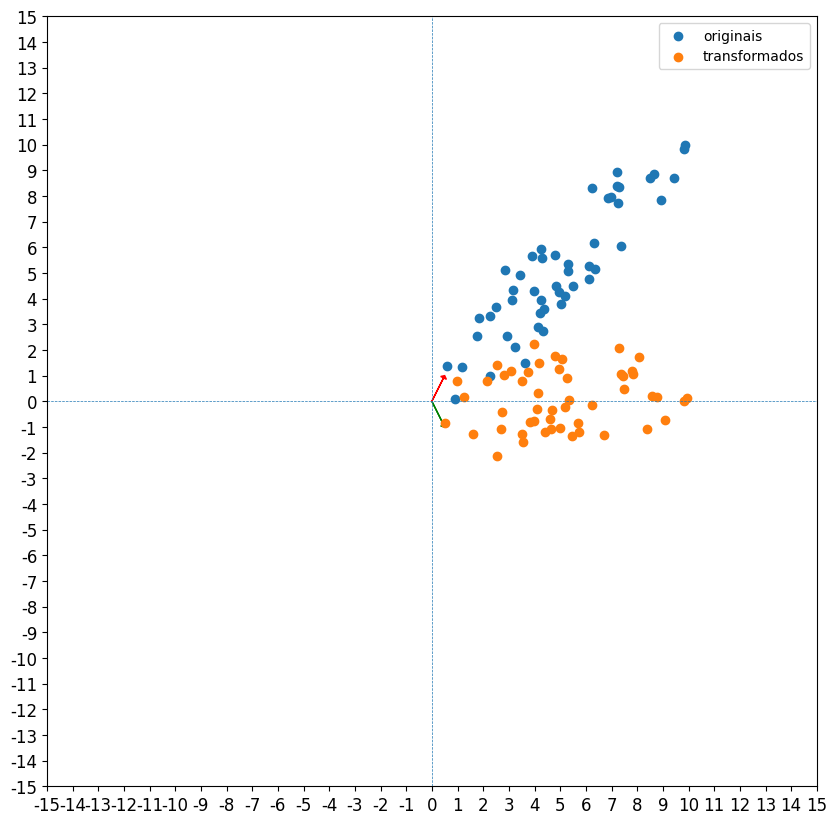

In [55]:
# Obtendo a média e a diferença através de uma multiplicação matricial
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

#Legenda
plt.legend()

In [56]:
# b) Calculando a correlação entre os dados da p1 e p2
corr = df['p1'].corr(df['p2'])
corr

0.8957365818728046

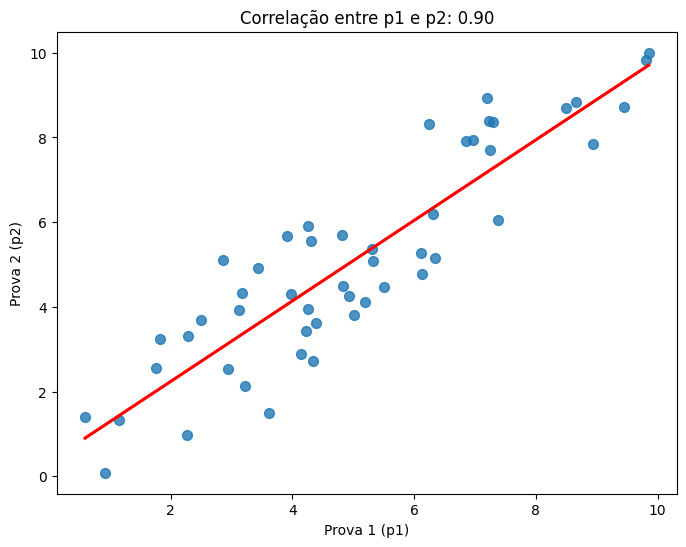

In [57]:
import seaborn as sns

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(8, 6))
sns.regplot(x='p1', 
            y='p2', 
            data=df, 
            ci=None, 
            scatter_kws={'s': 50}, 
            line_kws={'color': 'red'})

# Adicionando o valor da correlação no gráfico
plt.title(f'Correlação entre p1 e p2: {corr:.2f}')
plt.xlabel('Prova 1 (p1)')
plt.ylabel('Prova 2 (p2)')

# Exibindo o gráfico
plt.show()

In [58]:
# c) Calculando a correlação entre os dados transformados (média e diferença)
df_transformado = pd.DataFrame({
    'média': df_rot[0, :],
    'diferença': df_rot[1, :]})

corr_transformado = df_transformado['média'].corr(df_transformado['diferença'])

print(f'Correlação entre os dados transformados é: {corr_transformado:.4}\n')

Correlação entre os dados transformados é: 0.1335



d) Comente as correlações observadas.

-> Correlação entre os dados originais é de 0.90, enquanto a correlação entre a média e a diferença é 0.13. Esta última indica que não há relação significativa.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

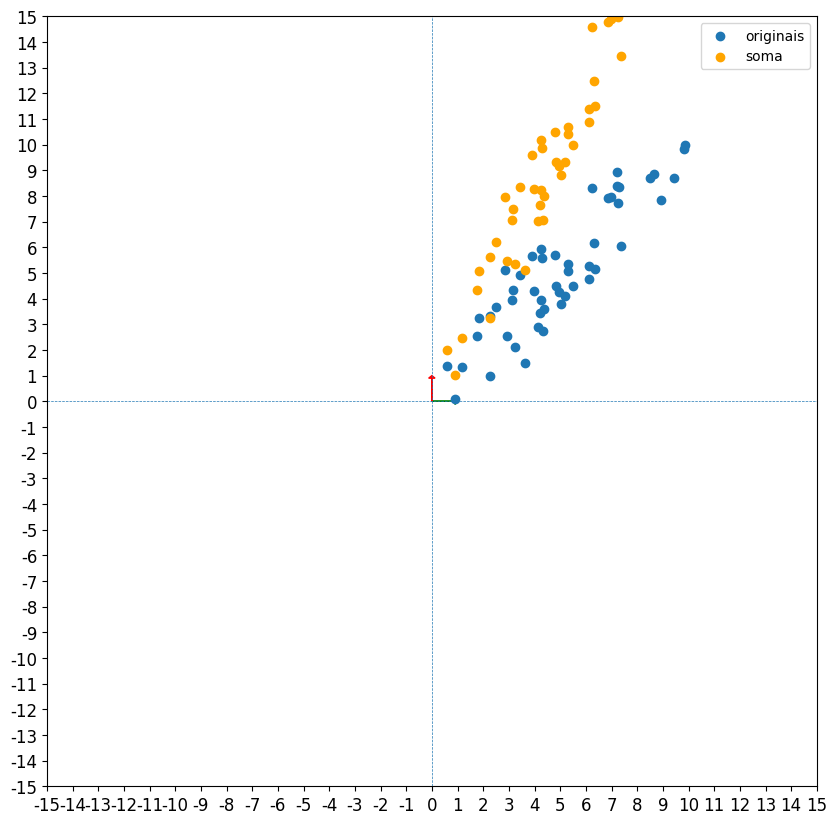

In [59]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Matrizes de transformação 
m = np.array([[1, 0],  # soma
              [0, 1]])
# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)

# Linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Calcular a soma das colunas p1 e p2
df_sum = df[['p1', 'p2']].sum(axis=1)

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados com a soma
plt.scatter(df['p1'], df_sum, label='soma', color='orange')

# Legenda
plt.legend()

plt.show()